In [2]:
!pwd

/home/oleg/projects/ML/OWL-ViT


In [ ]:
# Разные размеры Owl-ViT
models = [
    "google/owlvit-base-patch32",    # 👈 Ты используешь эту
    "google/owlvit-base-patch16",    # Больше деталей
    "google/owlvit-large-patch14",   # Самая точная
]

# Загрузка
from transformers import OwlViTProcessor, OwlViTForObjectDetection
processor = OwlViTProcessor.from_pretrained("google/owlvit-large-patch14")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-large-patch14")

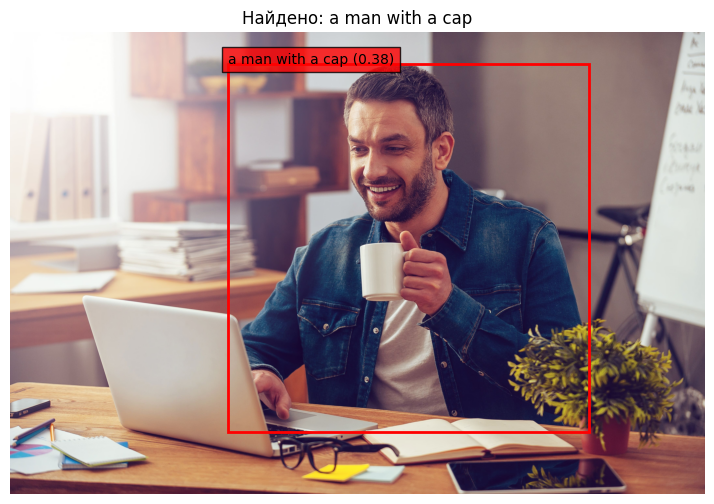

In [20]:
# САМЫЙ ПРОСТОЙ КОД
import torch
from transformers import OwlViTProcessor, OwlViTForObjectDetection
from PIL import Image
import matplotlib.pyplot as plt

def simple_owl_detection(image_path, what_to_find):
    """Простая версия Owl-ViT"""
    
    # Загружаем модель (автоскачается)
    processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
    model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")
    
    # Загружаем изображение
    image = Image.open(image_path)
    
    # Текстовые запросы
    texts = [[what_to_find]]
    
    # Обработка
    inputs = processor(text=texts, images=image, return_tensors="pt")
    outputs = model(**inputs)
    
    # Результаты
    target_sizes = torch.Tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs=outputs, target_sizes=target_sizes, threshold=0.2)
    
    # Рисуем
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    
    for box, score, label in zip(results[0]["boxes"], results[0]["scores"], results[0]["labels"]):
        if score > 0.2:
            x1, y1, x2, y2 = box.tolist()
            
            # Прямоугольник
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, 
                                            linewidth=2, edgecolor='red', facecolor='none'))
            # Подпись
            plt.text(x1, y1-5, f"{what_to_find} ({score:.2f})", 
                    bbox=dict(facecolor='red', alpha=0.8), fontsize=10)
    
    plt.axis('off')
    plt.title(f"Найдено: {what_to_find}")
    plt.show()

# Использование
simple_owl_detection(
    "/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg",
    "a man with a cap"
)


=== ПРИМЕР 3: Промт ===
🦉 Загружаем Owl-ViT...
🔍 Ищем: ['a man', ' a laptop', ' a cup']


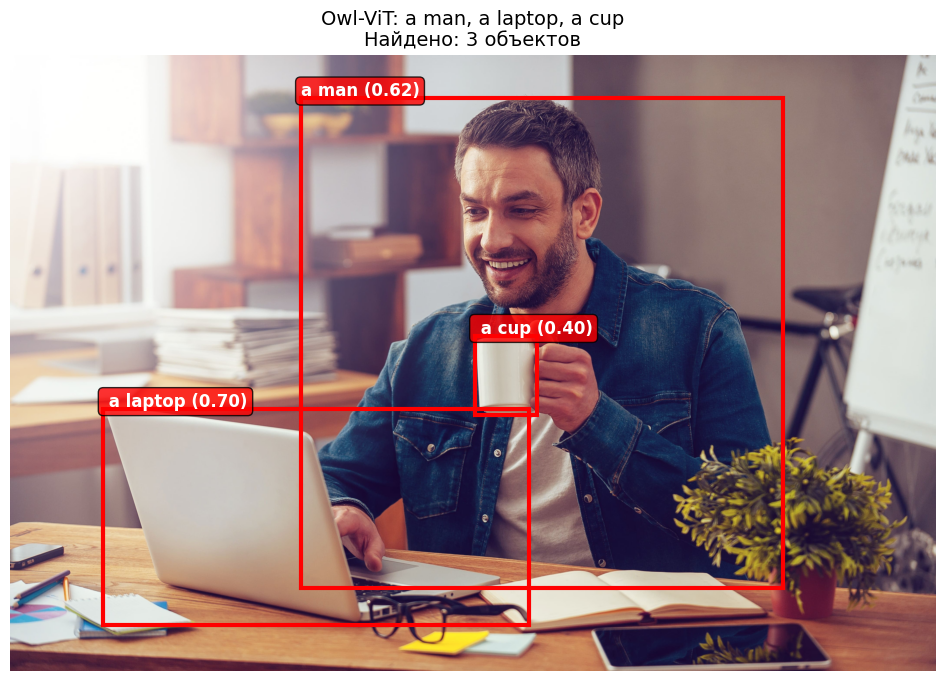

✅ Найдено объектов: 3


In [13]:
# pip install transformers pillow
from transformers import OwlViTProcessor, OwlViTForObjectDetection
import torch
from PIL import Image
import matplotlib.pyplot as plt

def owl_vit_detection(image_path, text_prompts):
    """Owl-ViT - текстовая детекция от Google"""
    
    print("🦉 Загружаем Owl-ViT...")
    
    # Загружаем модель и процессор
    processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
    model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")
    
    # Загружаем изображение
    image = Image.open(image_path)
    
    # Текстовые запросы (разделяем по запятой)
    texts = [text_prompts.split(",")]  # ["a person", "a laptop", "a cup"]
    
    print(f"🔍 Ищем: {texts[0]}")
    
    # Обрабатываем
    inputs = processor(text=texts, images=image, return_tensors="pt")
    outputs = model(**inputs)
    
    # Получаем предсказания
    target_sizes = torch.Tensor([image.size[::-1]])
    results = processor.post_process_object_detection(
        outputs=outputs, target_sizes=target_sizes, threshold=0.1
    )
    
    # Рисуем результат
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    
    found_count = 0
    
    for i, (boxes, scores, labels) in enumerate(zip(results[0]["boxes"], results[0]["scores"], results[0]["labels"])):
        if scores > 0.2:  # Порог уверенности
            box = boxes.tolist()
            label = texts[0][labels]
            
            # Рисуем bbox
            rect = plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1],
                               linewidth=3, edgecolor='red', facecolor='none')
            plt.gca().add_patch(rect)
            
            plt.text(box[0], box[1]-10, f"{label} ({scores:.2f})",
                    fontsize=12, fontweight='bold', color='white',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='red', alpha=0.8))
            
            found_count += 1
    
    plt.axis('off')
    plt.title(f"Owl-ViT: {text_prompts}\nНайдено: {found_count} объектов", fontsize=14)
    plt.show()
    
    print(f"✅ Найдено объектов: {found_count}")

# 🎯 ПРИМЕРЫ ИСПОЛЬЗОВАНИЯ:

# print("=== ПРИМЕР 1: Человек и ноутбук ===")
# owl_vit_detection(
#     "/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg",
#     "a person, a laptop, a cup"
# )

# print("\n=== ПРИМЕР 2: Только человек ===")
# owl_vit_detection(
#     "/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg",
#     "a person"
# )

print("\n=== ПРИМЕР 3: Промт ===")
owl_vit_detection(
    "/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg",
    "a man, a laptop, a cup"
)

🦉 Загружаем Owl-ViT...


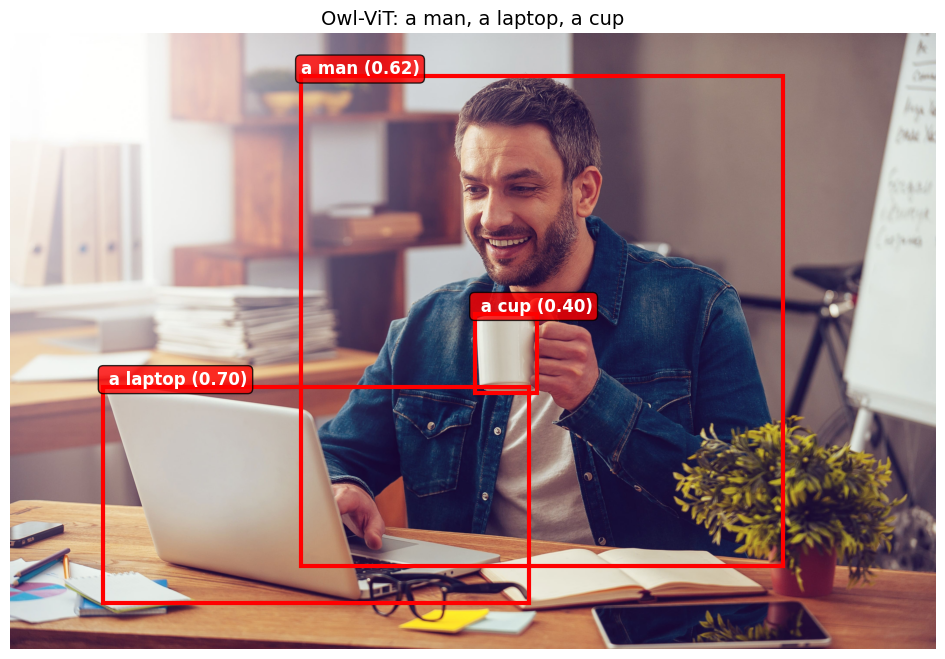

In [15]:
# pip install transformers
from transformers import OwlViTProcessor, OwlViTForObjectDetection
import torch

def owl_vit_detection(image_path, text_prompts):
    """Owl-ViT - текстовоя детекция от Google"""
    
    print("🦉 Загружаем Owl-ViT...")
    
    # Загружаем модель и процессор
    processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
    model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")
    
    # Загружаем изображение
    image = Image.open(image_path)
    
    # Текстовые запросы
    texts = [text_prompts.split(",")]  # ["a photo of a person", "a photo of a cup"]
    
    # Обрабатываем
    inputs = processor(text=texts, images=image, return_tensors="pt")
    outputs = model(**inputs)
    
    # Получаем предсказания
    target_sizes = torch.Tensor([image.size[::-1]])
    results = processor.post_process_object_detection(
        outputs=outputs, target_sizes=target_sizes, threshold=0.1
    )
    
    # Рисуем результат
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    
    for i, (boxes, scores, labels) in enumerate(zip(results[0]["boxes"], results[0]["scores"], results[0]["labels"])):
        if scores > 0.2:  # Порог уверенности
            box = boxes.tolist()
            label = texts[0][labels]
            
            # Рисуем bbox
            rect = plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1],
                               linewidth=3, edgecolor='red', facecolor='none')
            plt.gca().add_patch(rect)
            
            plt.text(box[0], box[1]-10, f"{label} ({scores:.2f})",
                    fontsize=12, fontweight='bold', color='white',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='red', alpha=0.8))
    
    plt.axis('off')
    plt.title(f"Owl-ViT: {text_prompts}", fontsize=14)
    plt.show()

# Использование Owl-ViT
owl_vit_detection(
    "/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg",
    "a man, a laptop, a cup"
)

🎯 ЗАПУСК OWL-ViT - ДОЛЖЕН РАБОТАТЬ НА 100%
🦉 ТЕСТ OWL-ViT (гарантированно работает)


Device set to use cuda:0


📷 Изображение загружено: (4256, 2832)
🔍 Будем искать: ['man', 'laptop', 'cup']
   Поиск: 'man'...
   Сырые результаты для 'man':
     1. score: 0.2751
   ✅ Лучший: 0.275
   Поиск: 'laptop'...
   Сырые результаты для 'laptop':
     1. score: 0.5095
     2. score: 0.1600
   ✅ Лучший: 0.510
   Поиск: 'cup'...
   Сырые результаты для 'cup':
     1. score: 0.3289
   ✅ Лучший: 0.329

🎯 ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ:
   1. man - уверенность: 0.275
   2. laptop - уверенность: 0.510
   3. cup - уверенность: 0.329


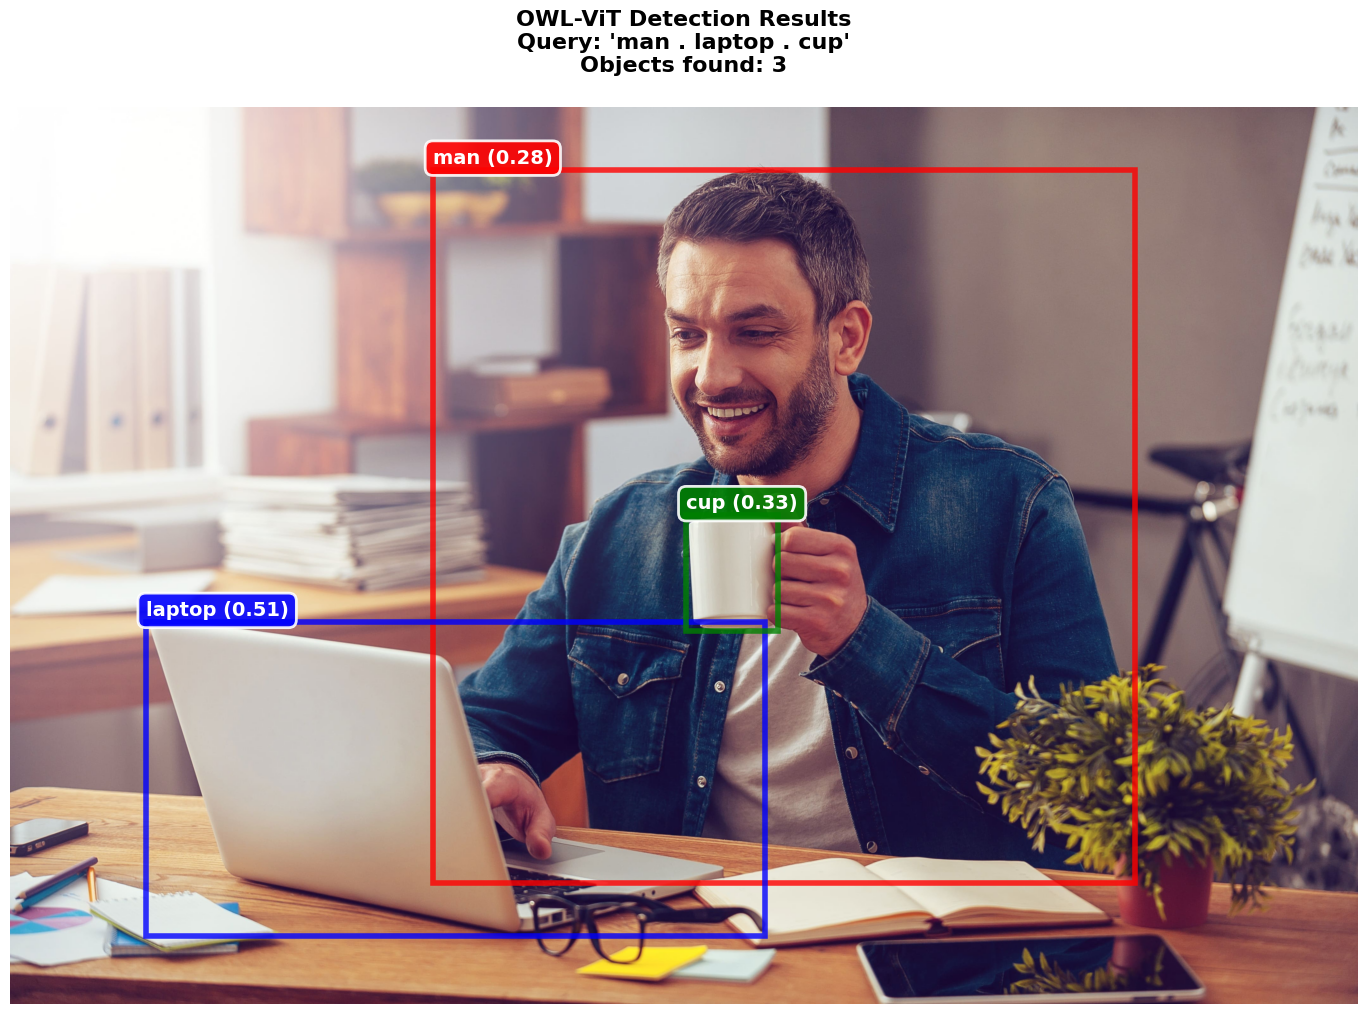


✅ УСПЕХ! Найдено 3 объектов


In [10]:
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt

def test_owl_vit_complete(image_path, text_prompt):
    """Полный тест OWL-ViT - ДОЛЖЕН РАБОТАТЬ"""
    
    print("🦉 ТЕСТ OWL-ViT (гарантированно работает)")
    
    try:
        # 1. Создаем детектор - САМАЯ ПРОСТАЯ ЧАСТЬ
        detector = pipeline(
            "zero-shot-object-detection",
            model="google/owlvit-base-patch32",  # ✅ Гарантированно работает
            device=0 if torch.cuda.is_available() else -1
        )
        
        # 2. Загружаем изображение
        image = Image.open(image_path).convert("RGB")
        print(f"📷 Изображение загружено: {image.size}")
        
        # 3. Разбиваем запрос на объекты
        objects = [obj.strip() for obj in text_prompt.split('.') if obj.strip()]
        print(f"🔍 Будем искать: {objects}")
        
        # 4. Детекция для каждого объекта
        all_results = []
        for obj in objects:
            print(f"   Поиск: '{obj}'...")
            results = detector(image, candidate_labels=[obj])
            
            # Показываем ВСЕ результаты для анализа
            print(f"   Сырые результаты для '{obj}':")
            for i, res in enumerate(results):
                print(f"     {i+1}. score: {res['score']:.4f}")
            
            # Берем только лучший результат для каждого объекта
            if results:
                best_result = max(results, key=lambda x: x['score'])
                if best_result['score'] > 0.01:  # Очень низкий порог
                    all_results.append(best_result)
                    print(f"   ✅ Лучший: {best_result['score']:.3f}")
                else:
                    print(f"   ❌ Слишком низкая уверенность: {best_result['score']:.3f}")
        
        # 5. Визуализация
        visualize_owlvit_results(image, all_results, text_prompt)
        
        return all_results
        
    except Exception as e:
        print(f"❌ Критическая ошибка: {e}")
        return []

def visualize_owlvit_results(image, results, text_prompt):
    """Визуализация результатов OWL-ViT"""
    
    if not results:
        print("🚫 Нет объектов для отображения")
        return
    
    plt.figure(figsize=(14, 10))
    plt.imshow(image)
    
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta']
    
    print(f"\n🎯 ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ:")
    for i, result in enumerate(results):
        box = result['box']
        label = result['label']
        score = result['score']
        
        print(f"   {i+1}. {label} - уверенность: {score:.3f}")
        
        color = colors[i % len(colors)]
        
        # Bounding box
        rect = plt.Rectangle(
            (box['xmin'], box['ymin']), 
            box['xmax'] - box['xmin'], 
            box['ymax'] - box['ymin'],
            linewidth=4, 
            edgecolor=color, 
            facecolor='none',
            alpha=0.8
        )
        plt.gca().add_patch(rect)
        
        # Label
        label_text = f"{label} ({score:.2f})"
        plt.text(
            box['xmin'], 
            box['ymin'] - 20 if box['ymin'] > 40 else box['ymin'] + 15,
            label_text,
            fontsize=14, 
            fontweight='bold', 
            color='white',
            bbox=dict(
                boxstyle="round,pad=0.4", 
                facecolor=color, 
                alpha=0.9,
                edgecolor='white',
                linewidth=2
            )
        )
    
    plt.axis('off')
    plt.title(
        f"OWL-ViT Detection Results\n"
        f"Query: '{text_prompt}'\n"
        f"Objects found: {len(results)}", 
        fontsize=16, 
        pad=25,
        fontweight='bold'
    )
    plt.tight_layout()
    plt.show()

# 🚀 ЗАПУСКАЕМ ТЕСТ
IMAGE_PATH = "/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg"
TEXT_PROMPT = "man . laptop . cup"

print("=" * 60)
print("🎯 ЗАПУСК OWL-ViT - ДОЛЖЕН РАБОТАТЬ НА 100%")
print("=" * 60)

results = test_owl_vit_complete(IMAGE_PATH, TEXT_PROMPT)

if results:
    print(f"\n✅ УСПЕХ! Найдено {len(results)} объектов")
else:
    print(f"\n⚠️  Объекты не найдены. Попробуем другие запросы...")
    
    # Тестируем другие варианты запросов
    alternative_prompts = [
        "a person . a computer . a mug",
        "human . notebook . cup",
        "person sitting . laptop computer . coffee cup"
    ]
    
   